In [2]:
import numpy as np
import matplotlib.pyplot as plt

## dev 10.1 Inside DFT 

Let's do a "manual" frequency decomposition of a periodic signal.

In [3]:
# Here is a rectangular periodic signal
N=10
k=np.arange(N)
rect=(k<(N//2))*2-1


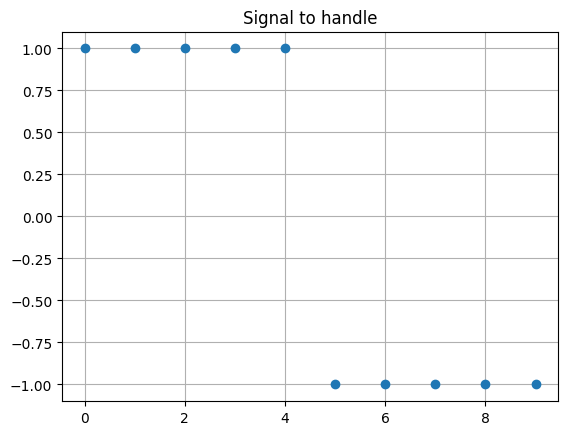

In [4]:
plt.plot(rect, 'o')
plt.grid()
plt.title("Signal to handle")
plt.show()

Let's define a sinusoidal wave of the exact period of the signal.

In [6]:
sin1=np.sin(2*np.pi*k/N)

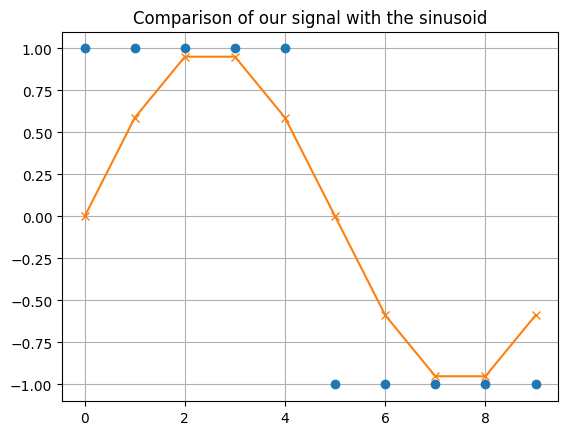

In [8]:
plt.plot(rect, 'o')
plt.plot(sin1, 'x-')
plt.grid()
plt.title("Comparison of our signal with the sinusoid")
plt.show()

We now observe the effect of the *convolution*. We multiply the sinusoid with our signal (sum of the product of the samples)

In [10]:
cs1=np.sum(sin1 * rect)
print(f"Sum of the production rectangle and sin : {cs1:.2f}")

Sum of the production rectangle and sin : 6.16


Let's try to do the *autocorrelation* of the sinus :

In [11]:
np.sum(sin1 * sin1)

np.float64(5.000000000000001)

OK, let presume that it's N/2. We normalize the output by this value.

In [15]:
cs1=np.sum(sin1 * rect)*2/N
cs1

np.float64(1.2310734148701015)

Now we substract this result from the original signal

In [16]:
srect1=rect-cs1*sin1


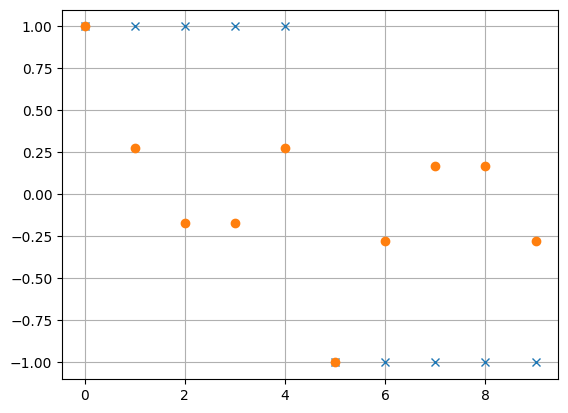

In [17]:
plt.plot(rect,'x')
plt.plot(srect1,'o')
plt.grid()
plt.show()

It looks like there is still a *fondamental* wave. Let's add the *cosinus* contribution to the wave :

In [18]:
# Define the cos wave as for the sin
cos1=np.cos(2*np.pi*k/N)
# Compute the convolution with the signal
cc1=np.sum(cos1 * rect)*2/N
[cs1,cc1]

[np.float64(1.2310734148701015), np.float64(0.4)]

Now we substract the contribution of sin and cos waves to the original signal.

In [19]:
srect1=rect-cs1*sin1-cc1*cos1

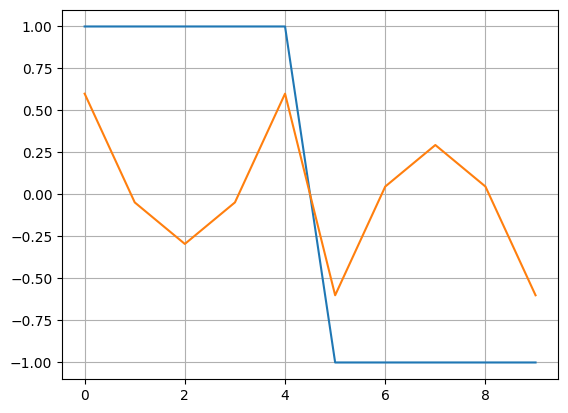

In [20]:
plt.plot(rect)
plt.plot(srect1)
plt.grid()
plt.show()

We continue with the *harmonics*, i.e. the multiples of the base frequency

In [21]:
#H=2 # First look a second harmonic
H=3

cs=np.zeros(N);cc=np.zeros(N)
cs[1]=cs1;cc[1]=cc1
asin=np.sin(H*2*np.pi*k/N)
acos=np.cos(H*2*np.pi*k/N)
cs[H]=np.sum(asin * rect)*2/N
cc[H]=np.sum(acos * rect)*2/N
[cs[H],cc[H]]

[np.float64(0.29061701120214434), np.float64(0.4000000000000001)]

We iterate on our decomposition, let's substract the next harmonic.

In [22]:
srect2=srect1-cs[H]*asin-cc[H]*acos

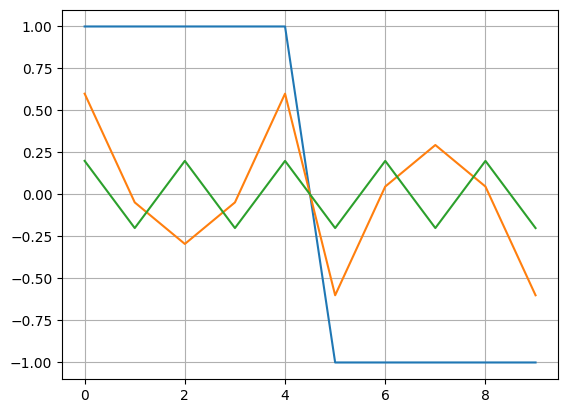

In [25]:
plt.plot(rect)
plt.plot(srect1)
plt.plot(srect2)
plt.grid()
plt.show()

In [26]:
#H=4 # Try the 4th harmonic
H=5

asin=np.sin(H*2*np.pi*k/N)
acos=np.cos(H*2*np.pi*k/N)
cs[H]=np.sum(asin * srect2)*2/N
cc[H]=np.sum(acos * srect2)*2/N
[cs[H],cc[H]]

[np.float64(-2.204364238465235e-16), np.float64(0.3999999999999999)]

We plan a factor to handle a problem...

In [27]:
#f=1.0
f=0.5
srect3=srect2-(cs[H]*asin+cc[H]*acos)*f

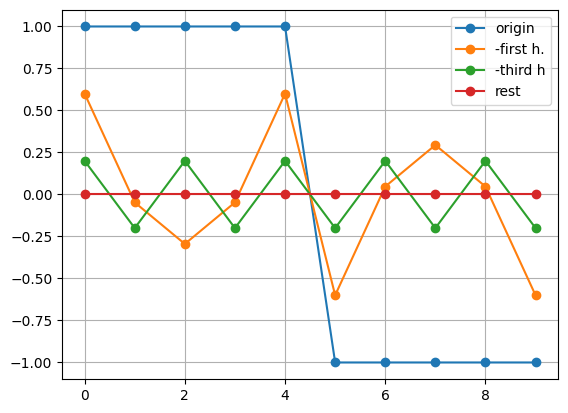

In [28]:
plt.plot(rect,'-o')
plt.plot(srect1,'-o')
plt.plot(srect2,'-o')
plt.plot(srect3,'-o')
plt.grid()
plt.legend(["origin","-first h.","-third h","rest"])
plt.show()

In the center, we have a problem. The sinus is no longer represented.

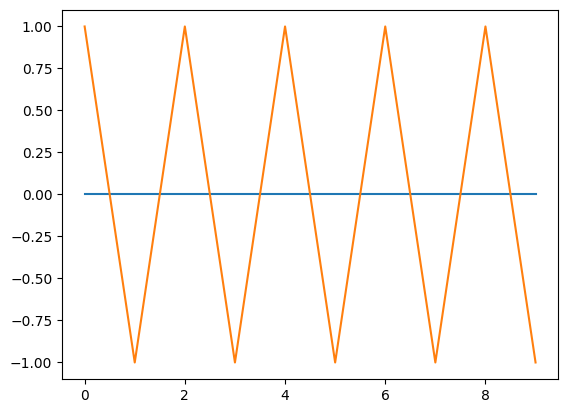

In [28]:
plt.plot(asin)
plt.plot(acos)
plt.show()

Time to calculate a DFT (with the FFT algorithm)

In [28]:
sfft=np.fft.fft(rect)*2/N
sfft

array([0. +0.00000000e+00j, 0.4-1.23107341e+00j, 0. +0.00000000e+00j,
       0.4-2.90617011e-01j, 0. +0.00000000e+00j, 0.4+4.44089210e-17j,
       0. +0.00000000e+00j, 0.4+2.90617011e-01j, 0. +0.00000000e+00j,
       0.4+1.23107341e+00j])

Compare our values with those of the FFT

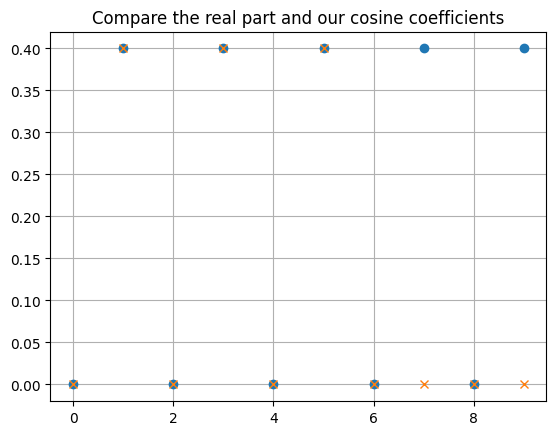

In [30]:
plt.plot(np.real(sfft),'o')
plt.plot(cc,'x')
plt.title("Compare the real part and our cosine coefficients")
plt.grid()

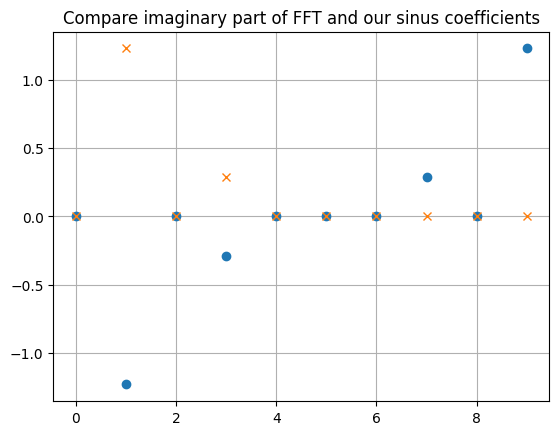

In [31]:
plt.plot(np.imag(sfft),'o')
plt.plot(cs,'x')
plt.grid()
plt.title("Compare imaginary part of FFT and our sinus coefficients")
plt.show()